## Portfolio assignment 16
30 min: Train a decision tree to predict one of the categorical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?
    
![](https://i.imgur.com/0v1CGNV.png)

Lets see if we can make predictions with the Global_Sales column as features.

In [19]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Formulas we work with


In [29]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [20]:
gameSales = pd.read_csv(r'D:\School\Leerjaar 2\2.3\Data Science\Notebooks\Datesets\vgsales.csv', sep =',')

In [21]:
gameSales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [22]:
gamesales_train, gamesales_test = train_test_split(gameSales, test_size=0.3, stratify=gameSales['Genre'], random_state=42)
print(gamesales_train.shape, gamesales_test.shape)

(11618, 11) (4980, 11)


In [71]:
features= ['Global_Sales']
dt_classification = DecisionTreeClassifier(max_depth = 10) # Increase max_depth to see effect in the plot
dt_classification.fit(gamesales_train[features], gamesales_train['Genre'])

DecisionTreeClassifier(max_depth=10)

In [72]:
predictionsOnTrainset = dt_classification.predict(gamesales_train[features])
predictionsOnTestset = dt_classification.predict(gamesales_train[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, gamesales_train.Genre)
accuracyTest = calculate_accuracy(predictionsOnTestset, gamesales_train.Genre)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.2051127560681701
Accuracy on test set 0.2051127560681701


No the result is not different. I think it has to do with al the inconsistencies in this dataset. You have to imagine that different times call for different type of games.

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
from sklearn import tree
import graphviz
def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 


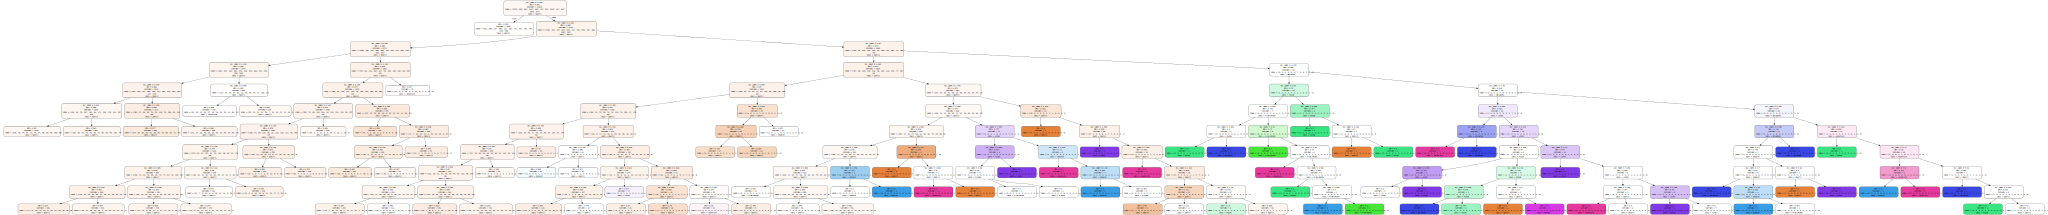

In [75]:
plot_tree_classification(dt_classification, features, gameSales.Genre.unique())

What i can understand is that when the machine takes the global sales as a feature he recognizes that Sport games generally sell in the lowest margin of sales. In contrast to Shooter/Puzzle games who score alot higher. 